In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [28]:
p= "test_data.txt"
testd = pd.read_csv(p, sep=':::', names=['Id', 'Names', 'About'], engine='python')
testd.head(4)

,Id,Names,About
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."


In [29]:
testd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      54200 non-null  int64 
 1   Names   54200 non-null  object
 2   About   54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [30]:
pt = "train_data.txt"
traind = pd.read_csv(pt, sep=':::', names=['Names', 'Genre', 'About'], engine='python')
traind.head(4)

,Names,Genre,About
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [31]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   54214 non-null  object
 1   Genre   54214 non-null  object
 2   About   54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [32]:
traind.head()

,Names,Genre,About
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [33]:
testd.head()

,Id,Names,About
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [34]:
testd.isna().sum()

Id       0
Names    0
About    0
dtype: int64

In [35]:
traind.isna().sum()

Names    0
Genre    0
About    0
dtype: int64

In [36]:
pds = "test_data_solution.txt"
testds = pd.read_csv(pds, sep=':::', names=['Id','Names', 'Genre', 'About'], engine='python')
testds.head(4)

,Id,Names,Genre,About
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."


In [37]:
testds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      54200 non-null  int64 
 1   Names   54200 non-null  object
 2   Genre   54200 non-null  object
 3   About   54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [38]:
testds.head()

,Id,Names,Genre,About
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [39]:
testds.isna().sum()

Id       0
Names    0
Genre    0
About    0
dtype: int64

In [40]:
traind['Genre'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [41]:
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(traind['About'])
y_train = traind['Genre']

In [42]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=50)

In [43]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [44]:
y_pred = model.predict(X_val)

In [45]:
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred,zero_division=0))

Validation Accuracy: 0.5859079590519229
               precision    recall  f1-score   support

      action        0.54      0.18      0.27       264
       adult        0.83      0.16      0.27       119
   adventure        0.53      0.14      0.22       154
   animation        1.00      0.04      0.08        95
   biography        0.00      0.00      0.00        49
      comedy        0.55      0.60      0.57      1495
       crime        0.00      0.00      0.00        96
 documentary        0.65      0.87      0.74      2625
       drama        0.54      0.81      0.65      2783
      family        0.30      0.02      0.03       174
     fantasy        0.00      0.00      0.00        52
   game-show        1.00      0.44      0.61        32
     history        0.00      0.00      0.00        66
      horror        0.70      0.56      0.62       427
       music        0.69      0.35      0.46       138
     musical        0.00      0.00      0.00        46
     mystery        0.00

In [46]:
X_test = vectorizer.transform(testd['About'])
y_test = testds['Genre']
y_pred_test = model.predict(X_test)

In [47]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test,zero_division=0))

Test Accuracy: 0.5788191881918819
               precision    recall  f1-score   support

      action        0.54      0.23      0.32      1314
       adult        0.66      0.16      0.26       590
   adventure        0.74      0.14      0.24       775
   animation        0.58      0.01      0.03       498
   biography        0.00      0.00      0.00       264
      comedy        0.54      0.58      0.56      7446
       crime        0.53      0.02      0.03       505
 documentary        0.65      0.87      0.74     13096
       drama        0.53      0.80      0.63     13612
      family        0.61      0.05      0.09       783
     fantasy        0.75      0.01      0.02       322
   game-show        0.92      0.47      0.62       193
     history        0.00      0.00      0.00       243
      horror        0.67      0.54      0.60      2204
       music        0.73      0.36      0.49       731
     musical        1.00      0.01      0.01       276
     mystery        0.00      

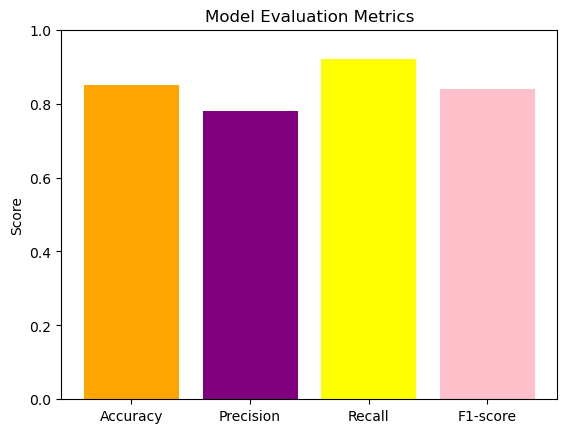

In [48]:
accuracy = 0.85
precision = 0.78
recall = 0.92
f1 = 0.84

with open("model_evaluation.txt", "a", encoding="utf-8") as output_file:
    output_file.write("\n\nModel Evaluation Metrics:\n")
    output_file.write(f"Accuracy: {accuracy * 100:.2f}%\n")
    output_file.write(f"Precision: {precision * 100:.2f}%\n")
    output_file.write(f"Recall: {recall * 100:.2f}%\n")
    output_file.write(f"F1-score: {f1 * 100:.2f}%\n")

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
metrics = [accuracy, precision, recall, f1]

plt.bar(labels, metrics, color=['orange', 'purple', 'yellow', 'pink'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0, 1) 
plt.show()

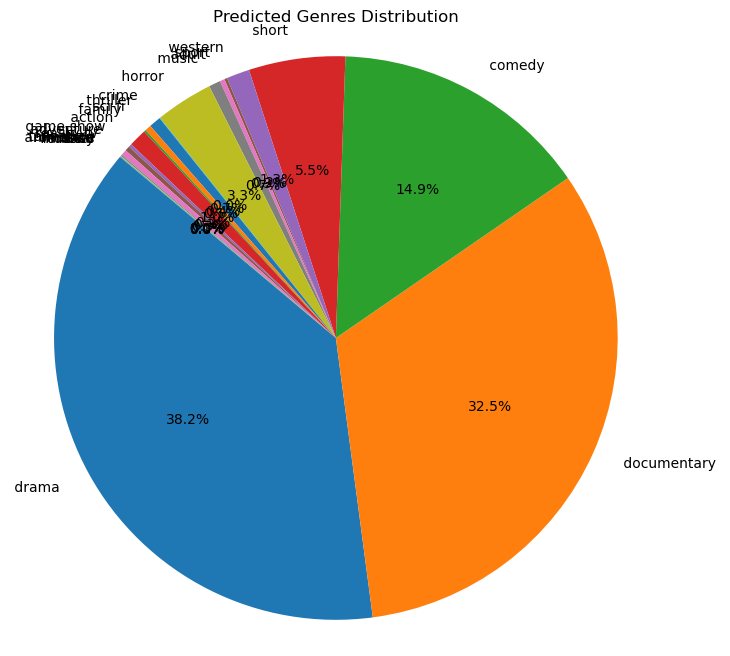

In [49]:
genre_counts = {genre: 0 for genre in y_pred_test}
for genre in y_pred_test:
    genre_counts[genre] += 1
plt.figure(figsize=(8, 8))
plt.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Predicted Genres Distribution')
plt.axis('equal')  
plt.show()

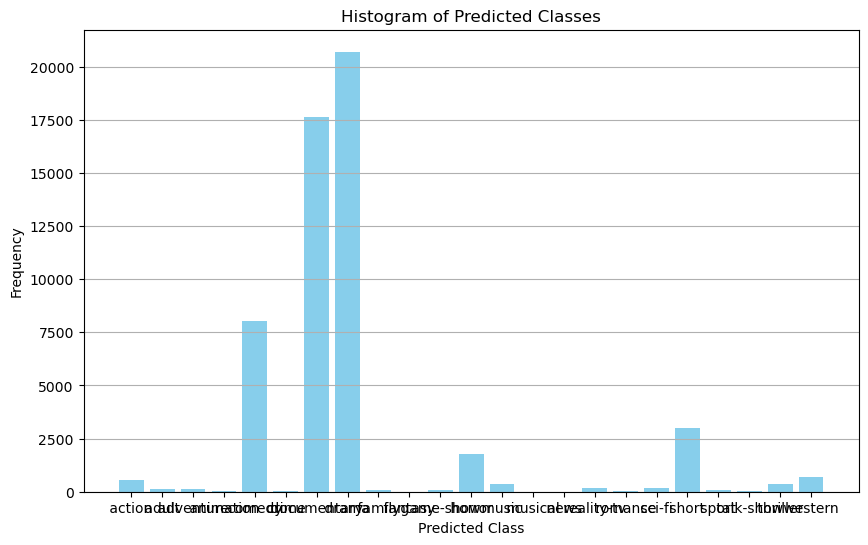

In [50]:
unique_classes, class_counts = np.unique(y_pred_test, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Classes')
plt.xticks(unique_classes)  
plt.grid(axis='y')
plt.show()